# **Data Analytics Assignment**

## Understanding the dataset

- Dataset contains rows that represent a patient's healthcare record and employment information. This dataset contains various attributes related to patient's health and demographics. It includes the patient's unique identifier (Id), gender, age, hypertension status, heart disease status, marital status, work type, residence type, average glucose levels, body mass index (BMI), smoking status, and stroke history.

Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd

In [4]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [5]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


The dataset consists of 5110 rows and 12 columns, with different data types for each column. Four columns ('id', 'hypertension', 'heart_disease', 'stroke') contain integers, five columns ('gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status') contain strings, and the remaining three columns ('age', 'avg_glucose_level', 'bmi') contain floating-point numbers.

In [7]:
dataset = dataset.drop(columns=['id'])
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


The 'id' attribute is irrelevant to predicting whether a patient will suffer a stroke or not.

In [8]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

The 'bmi' column contains 201 null values.

In [9]:
dataset['bmi'].isnull().sum() * 100 / len(dataset['bmi'])

3.9334637964774952

The 'bmi' column contains approximately 4% of null values compared to non-null values, which is less than 5%. Since the contribution of 'bmi' to the likelihood of a person getting a stroke is uncertain, one option is to drop these specific records with null values. However, for a more cautious approach, filling in the null values with either the mean value of all remaining 'bmi' values or the most frequently occurring 'bmi' value could be considered.

Using Simple Imputer to replace the null values

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
dataset['bmi'] = imputer.fit_transform(dataset[['bmi']])

Constructing Age Group from Age

In [11]:
def age_to_age_category(age):
    if age<12:
        return 'Child'
    elif 12 <= age < 18:
        return 'Adolescent'
    elif 18 <= age < 65:
        return 'Adult'
    elif age >= 65:
        return 'Senior'

dataset['age_category'] = dataset.apply(lambda row: age_to_age_category(row['age']), axis=1)

Constructing BMI Category from BMI

In [12]:
def bmi_to_bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal'
    elif 25 <= bmi:
        return 'Overweight'
    
dataset['bmi_category'] = dataset.apply(lambda row: bmi_to_bmi_category(row['bmi']), axis=1)

Plotting graphs

Count plot of Gender and Stroke sufferers

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


<Axes: xlabel='gender', ylabel='count'>

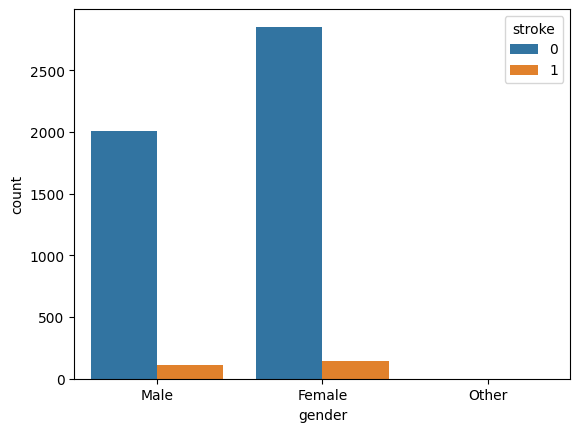

In [13]:
print(dataset['gender'].value_counts())
seaborn.countplot(data=dataset, x='gender', hue='stroke')

- from this gender v/s count graph it can be seen that the no. of stroke sufferers is about the same and doesn't depend on the gender of the person.

Histogram plot for Age and Stroke sufferers

age
0.08       2
0.16       3
0.24       5
0.32       5
0.40       2
        ... 
78.00    102
79.00     85
80.00     70
81.00     60
82.00     56
Name: count, Length: 104, dtype: int64


<Axes: xlabel='age', ylabel='Count'>

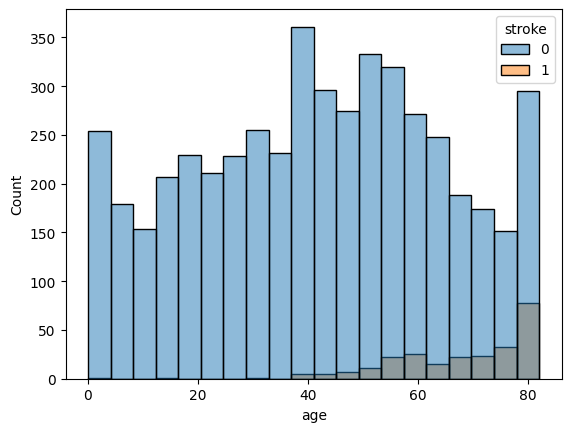

In [14]:
print(dataset['age'].value_counts().sort_index())
seaborn.histplot(data=dataset, x='age', hue='stroke')

It has been observed that people suffering from hypertension and people not suffering from hypertension have had stroke.

Histogram plot for Bmi and Stroke sufferers

bmi
14.900000      1
47.100000      1
46.400000      1
14.000000      1
45.800000      1
            ... 
26.700000     37
27.600000     37
28.400000     38
28.700000     41
28.893237    201
Name: count, Length: 419, dtype: int64


<Axes: xlabel='bmi', ylabel='Count'>

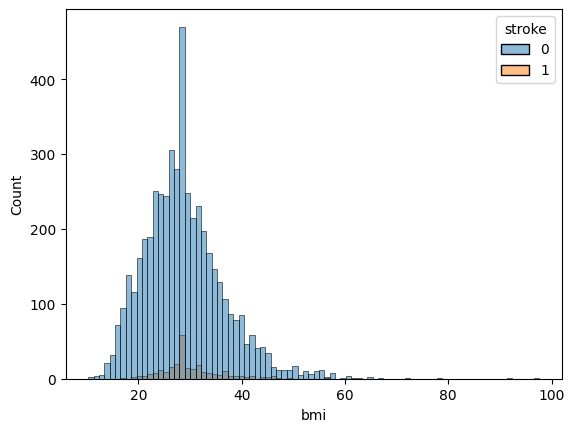

In [15]:
print(dataset['bmi'].value_counts().sort_values())
seaborn.histplot(data=dataset, x='bmi', hue='stroke')

It is not clear here whether BMI (body mass index) directly affects the chances of having a stroke or not.

Graph for Bmi_category and Stroke sufferers

bmi_category
Overweight     3530
Normal         1243
Underweight     337
Name: count, dtype: int64


<Axes: xlabel='bmi_category', ylabel='count'>

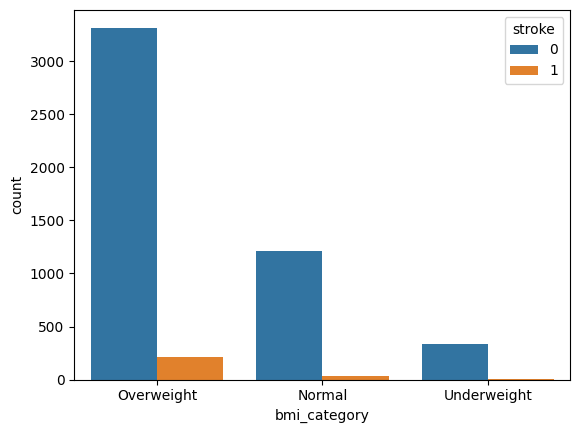

In [16]:
print(dataset['bmi_category'].value_counts())
seaborn.countplot(data=dataset, x='bmi_category', hue='stroke')

Here it is observed that people classified as overweight and obese-1 categories have a higher risk of stroke, followed by those in the normal weight category and individuals categorized as underweight have the lowest risk of stroke.

Mean, Median and Standard Deviation of the dataset

In [17]:
dataset.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Removing outlier

In [18]:
for col in ['avg_glucose_level', 'bmi']:
    q1 = dataset[col].quantile(0.25)
    q3 = dataset[col].quantile(0.75)
    IQR = q3 - q1
    lower_value = q1 - 1.5 * IQR
    upper_value = q3 + 1.5 * IQR
    dataset = dataset[dataset[col] > lower_value]
    dataset = dataset[dataset[col] < upper_value]


In [19]:

dataset.shape

(4383, 13)

Encoding the categorial columns

In [20]:
from sklearn.preprocessing import LabelEncoder

gender_enc = LabelEncoder()
married_enc = LabelEncoder()
work_enc = LabelEncoder()
residence_enc = LabelEncoder()
smoking_enc = LabelEncoder()
age_category_enc = LabelEncoder()
bmi_category_enc = LabelEncoder()

dataset['gender'] = gender_enc.fit_transform(dataset['gender'])
dataset['ever_married'] = married_enc.fit_transform(dataset['ever_married'])
dataset['work_type'] = work_enc.fit_transform(dataset['work_type'])
dataset['Residence_type'] = residence_enc.fit_transform(dataset['Residence_type'])
dataset['smoking_status'] = smoking_enc.fit_transform(dataset['smoking_status'])
dataset['age_category'] = age_category_enc.fit_transform(dataset['age_category'])
dataset['bmi_category'] = bmi_category_enc.fit_transform(dataset['bmi_category'])

dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,bmi_category
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1,3,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1,3,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1,3,0
8,0,59.0,0,0,1,2,0,76.15,28.893237,0,1,1,1
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1,3,0


Feature Scaling

In [21]:
dataset.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,bmi_category
count,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000
mean,0.410449,40.893762,0.074378,0.039243,0.622861,2.201916,0.507643,91.476126,27.770010,1.344285,0.037417,1.395163,0.805156
std,0.492435,22.565008,0.262415,0.194194,0.484725,1.110744,0.499999,22.663253,6.521408,1.084882,0.189804,0.846446,0.555378
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,0.000000,2.000000,0.000000,75.075000,23.200000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,42.000000,0.000000,0.000000,1.000000,2.000000,1.000000,88.040000,27.600000,2.000000,0.000000,1.000000,1.000000
75%,1.000000,58.000000,0.000000,0.000000,1.000000,3.000000,1.000000,104.025000,31.800000,2.000000,0.000000,2.000000,1.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,168.680000,45.500000,3.000000,1.000000,3.000000,2.000000


Normalization

In [22]:
from sklearn.preprocessing import MinMaxScaler
cols = dataset.columns
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

dataset = pd.DataFrame(dataset, columns=cols)
dataset.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,bmi_category
count,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000
mean,0.205225,0.498215,0.074378,0.039243,0.622861,0.550479,0.507643,0.320149,0.496307,0.448095,0.037417,0.465054,0.402578
std,0.246218,0.275452,0.262415,0.194194,0.484725,0.277686,0.499999,0.199571,0.185267,0.361627,0.189804,0.282149,0.277689
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.279785,0.000000,0.000000,0.000000,0.500000,0.000000,0.175722,0.366477,0.000000,0.000000,0.333333,0.000000
50%,0.000000,0.511719,0.000000,0.000000,1.000000,0.500000,1.000000,0.289891,0.491477,0.666667,0.000000,0.333333,0.500000
75%,0.500000,0.707031,0.000000,0.000000,1.000000,0.750000,1.000000,0.430653,0.610795,0.666667,0.000000,0.666667,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Saving the preprocessed file to csv

In [23]:
dataset.to_csv('preprocessed_dataset.csv')